In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import itertools
import os

os.chdir("C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-25_2025_test")

In [86]:
def plot_from_csv(file_name, x_column_name = ["V_mon", "I_mon"]):
    """
    Imports two columns from a CSV file and displays the FFT spectrum of the x column up to the Nyquist frequency.

    Parameters:
        file_name (str): Path to the CSV file.
        x_column_name (str): The name of the x-column in the CSV.
        sample_rate (float): Sampling rate of the data in Hz.
    """
    # Import the CSV file using pandas
    data = pd.read_csv(file_name)

    # Extract the x column
    voltage = data[x_column_name[0]]
    current = data[x_column_name[1]]

    # find total ramp time from file name 
    match = re.search(r'_(\d+)s', file_name)
    ramp_time = match.group(1)
    t_stamp = np.linspace(0,float(ramp_time), len(voltage))

    fig, ax = plt.subplots(1,2, figsize = [15,6])
    ax[0].plot(t_stamp, voltage)
    ax[1].plot(t_stamp, current)
    ax[0].set_xlabel("time/s ")
    ax[0].set_ylabel("voltage / kV ")
    ax[1].set_xlabel("time/s ")
    ax[1].set_ylabel("current / uA ")

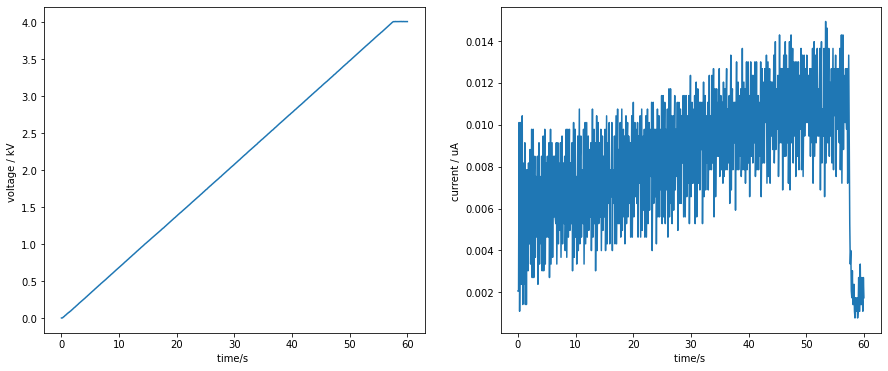

In [87]:
file_name = 'ramp_and_record_0.000V_to_4.000V_step_0.01V_in_60s_2025-02-25_16-25-30_DAQ.csv'
plot_from_csv(file_name)  # Assuming sample rate of 1000 Hz

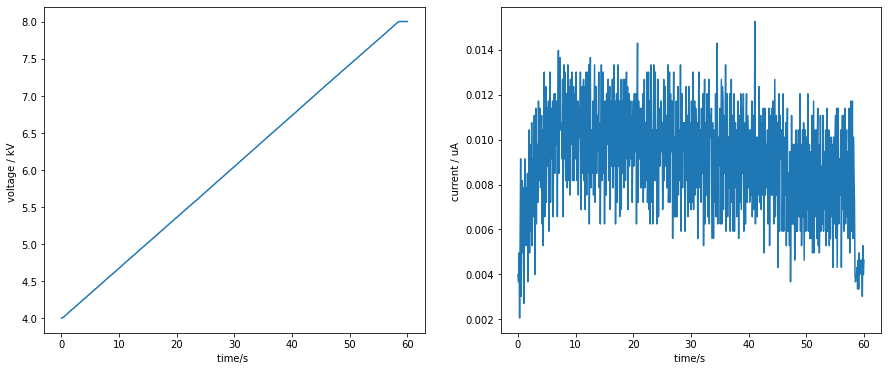

In [88]:
file_name = 'ramp_and_record_4.000V_to_8.000V_step_0.01V_in_60s_2025-02-25_16-27-01_DAQ.csv'
plot_from_csv(file_name)  # Assuming sample rate of 1000 Hz

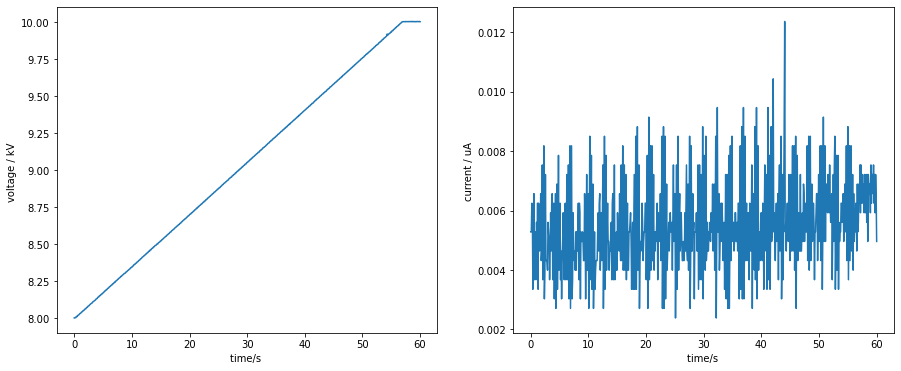

In [89]:
file_name = 'ramp_and_record_8.000V_to_10.000V_step_0.01V_in_60s_2025-02-25_16-28-59_DAQ.csv'
plot_from_csv(file_name)  # Assuming sample rate of 1000 Hz

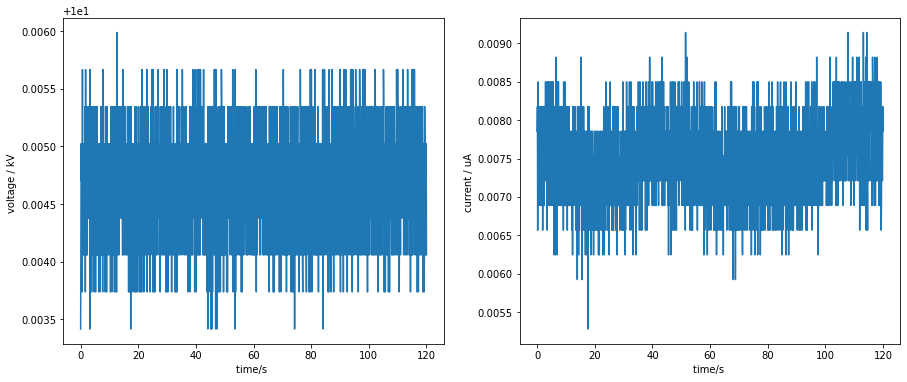

In [90]:
file_name = 'rec_at_10_recording_120s_2025-02-25_16-31-06_DAQ.csv'
plot_from_csv(file_name)  # Assuming sample rate of 1000 Hz

In [115]:
### combine csv files data and plot
file_name = ['ramp_and_record_0.000V_to_4.000V_step_0.01V_in_60s_2025-02-25_16-25-30_DAQ.csv','ramp_and_record_4.000V_to_8.000V_step_0.01V_in_60s_2025-02-25_16-27-01_DAQ.csv','ramp_and_record_8.000V_to_10.000V_step_0.01V_in_60s_2025-02-25_16-28-59_DAQ.csv','rec_at_10_recording_120s_2025-02-25_16-31-06_DAQ.csv']
x_column_name = ["V_mon", "I_mon"]
ramp_time_tot = 0

V_tot = []
I_tot = []

for f_name in file_name:
    # Import the CSV file using pandas
    data = pd.read_csv(f_name)
    # Extract the x column
    V_tot.append(data[x_column_name[0]].squeeze().astype(float).tolist())
    I_tot.append(data[x_column_name[1]].squeeze().astype(float).tolist())

    # find total ramp time from file name 
    match = re.search(r'_(\d+)s', f_name)
    ramp_time_single = match.group(1)
    ramp_time_tot += float(ramp_time_single)

V_tot = np.array(list(itertools.chain(*V_tot))) / 10 * 30
I_tot = np.array(list(itertools.chain(*I_tot))) / 10 * 400
time_stamp = np.linspace(0,float(ramp_time_tot), len(V_tot))


Text(0.5, 0.98, '1st 30kV ramp up, time each ramp 60.0s')

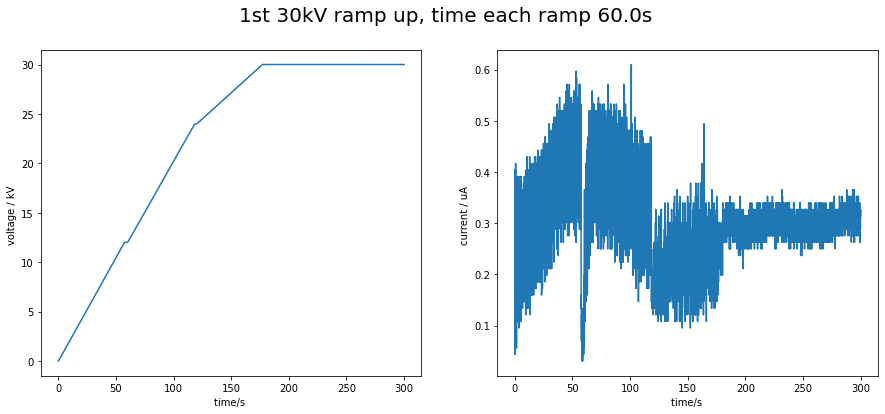

In [117]:
fig, ax = plt.subplots(1,2, figsize = [15,6])
ax[0].plot(time_stamp, V_tot)
ax[1].plot(time_stamp, I_tot)
ax[0].set_xlabel("time/s ")
ax[0].set_ylabel("voltage / kV ")
ax[1].set_xlabel("time/s ")
ax[1].set_ylabel("current / uA ")

match = re.search(r'_(\d+)s', file_name[0])
ramp_time_single = match.group(1)
fig.suptitle(f'1st 30kV ramp up, time each ramp {int(ramp_time_single):.1f}s', fontsize=20)

In [119]:
### combine csv files data and plot
file_name = ['ramp_and_record_10.000V_to_8.000V_step_0.01V_in_60s_2025-02-25_16-37-33_DAQ.csv','ramp_and_record_8.000V_to_4.000V_step_0.01V_in_60s_2025-02-25_16-39-44_DAQ.csv','ramp_and_record_4.000V_to_0.000V_step_0.01V_in_60s_2025-02-25_16-41-20_DAQ.csv']
x_column_name = ["V_mon", "I_mon"]
ramp_time_tot = 0

V_tot = []
I_tot = []

for f_name in file_name:
    # Import the CSV file using pandas
    data = pd.read_csv(f_name)
    # Extract the x column
    V_tot.append(data[x_column_name[0]].squeeze().astype(float).tolist())
    I_tot.append(data[x_column_name[1]].squeeze().astype(float).tolist())

    # find total ramp time from file name 
    match = re.search(r'_(\d+)s', f_name)
    ramp_time_single = match.group(1)
    ramp_time_tot += float(ramp_time_single)

V_tot = np.array(list(itertools.chain(*V_tot))) / 10 * 30
I_tot = np.array(list(itertools.chain(*I_tot))) / 10 * 400
time_stamp = np.linspace(0,float(ramp_time_tot), len(V_tot))

Text(0.5, 0.98, '1st 30kV ramp down, time each ramp 60.0s')

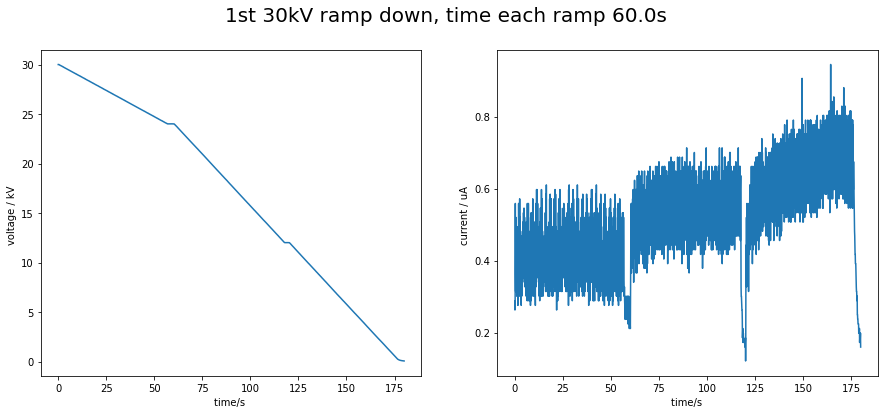

In [120]:
fig, ax = plt.subplots(1,2, figsize = [15,6])
ax[0].plot(time_stamp, V_tot)
ax[1].plot(time_stamp, I_tot)
ax[0].set_xlabel("time/s ")
ax[0].set_ylabel("voltage / kV ")
ax[1].set_xlabel("time/s ")
ax[1].set_ylabel("current / uA ")

match = re.search(r'_(\d+)s', file_name[0])
ramp_time_single = match.group(1)
fig.suptitle(f'1st 30kV ramp down, time each ramp {int(ramp_time_single):.1f}s', fontsize=20)